## 1.3 Visualizing the February 2020 event

In this notebook, I will analyze the precipitation anomalies of the 2020 event in the EOBS dataset. Based on this event, we will select a domain to further investigate in the SEAS5 UNSEEN ensemble.  

### Import packages

In [1]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [30]:
##import packages
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mticker


In [3]:
##We want the working directory to be the UNSEEN-open directory
pwd = os.getcwd() ##current working directory is UNSEEN-open/Notebooks/1.Download
pwd #print the present working directory
os.chdir(pwd+'/../../') # Change the working directory to UNSEEN-open
os.getcwd() #print the working directory

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-open/Notebooks/1.Download'

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-open'

## Load EOBS

Here I will compare SEAS5 to the EOBS historical precipitation. I tried to download EOBS through CDS, but the Product was temporally disabled for maintenance purposes. As workaround, here, I downloaded EOBS (from 1950 - 2019) and the most recent EOBS data (2020) [here](https://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php). 

I will select February monthly mean precipitation to compare to SEAS5. I have taken the average mm/day over the month, which I think is more fair than the total monthly precipitation because of leap days. 

In [4]:
EOBS = xr.open_dataset('../UK_example/EOBS/rr_ens_mean_0.25deg_reg_v20.0e.nc') ## open the data
EOBS = EOBS.resample(time='1m').mean() ## Monthly averages
EOBS = EOBS.sel(time=EOBS['time.month'] == 2) ## Select only February
EOBS

/soge-home/users/cenv0732/.conda/envs/UNSEEN-open/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 70)
Coordinates:
  * time       (time) datetime64[ns] 1950-02-28 1951-02-28 ... 2019-02-28
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
Data variables:
    rr         (time, latitude, longitude) float32 nan nan nan ... nan nan nan

Here I define the attributes, that xarray uses when plotting

/soge-home/users/cenv0732/.conda/envs/UNSEEN-open/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 70)
Coordinates:
  * time       (time) datetime64[ns] 1950-02-28 1951-02-28 ... 2019-02-28
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
Data variables:
    rr         (time, latitude, longitude) float32 nan nan nan ... nan nan nan

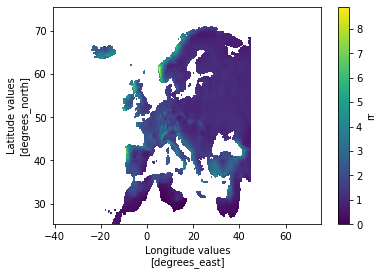

In [16]:
EOBS['rr'].attrs = {'long_name': 'rainfall',  ##Define the name
 'units': 'mm/day', ## unit
 'standard_name': 'thickness_of_rainfall_amount'} ## original name, not used
EOBS['rr'].mean('time').plot() ## and show the 1950-2019 average February precipitation 


The 2020 data file is separate and needs the same preprocessing:

/soge-home/users/cenv0732/.conda/envs/UNSEEN-open/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-31 2020-02-29 ... 2020-12-31
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
Data variables:
    rr         (time, latitude, longitude) float32 nan nan nan ... nan nan nan

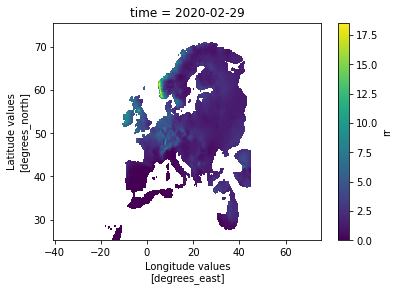

In [6]:
EOBS2020 = xr.open_dataset('../UK_example/EOBS/rr_0.25deg_day_2020_grid_ensmean.nc') #open
EOBS2020 = EOBS2020.resample(time='1m').mean() #Monthly mean
EOBS2020['rr'].sel(time='2020-02').plot() #show map
EOBS2020 ## display dataset

We had to download EOBS in two separate files to also obtain the 2020 data. Below, we concatenate the two files and store the processed data for easy import in the future

In [ ]:
EOBS_concat = xr.concat([EOBS,EOBS2020.sel(time='2020-02')],dim='time') ## Concatenate the 1950-2019 and 2020 datasets. 
EOBS_concat.to_netcdf('../UK_example/EOBS/EOBS.nc') ## And store the 1950-2010 February precipitation into one nc for future import 

## Plot the 2020 event

In [27]:
EOBS2020_anomaly = EOBS2020['rr']-EOBS['rr'].mean('time')
EOBS2020_sd_anomaly = EOBS2020_anomaly/EOBS['rr'].std('time')

EOBS2020_sd_anomaly.attrs = {'long_name': 'Monthly precipitation standardized anomaly',
 'units': '-'}

EOBS2020_sd_anomaly

<xarray.DataArray 'rr' (time: 12, latitude: 201, longitude: 464)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-31 2020-02-29 ... 2020-12-31
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
Attributes:
    long_name:  Monthly precipitation standardized anomaly
    units:      -

Text(0.5, 1.0, 'February 2020')

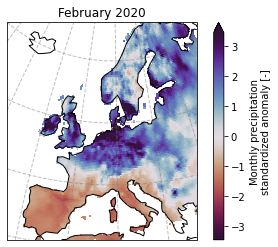

In [36]:
ax = plt.axes(projection=ccrs.EuroPP())
# fig, axs = plt.subplots(1, 2,subplot_kw={'projection': ccrs.EuroPP()})

# EOBS2020_anomaly.sel(time='2020-02').plot(transform=ccrs.PlateCarree(), robust = True, cmap=plt.cm.twilight_shifted_r, ax=axs[0])
EOBS2020_sd_anomaly.sel(time='2020-02').plot(transform=ccrs.PlateCarree(), robust = True, cmap=plt.cm.twilight_shifted_r, ax=ax)
#  .plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[0]))  #,cmap=plt.cm.Blues,
# EOBS['rr'].mean('time').plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[1])

ax.coastlines(resolution='110m')
# ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
# gl.top_labels = False
# gl.right_labels = False
gl.ylocator = mticker.FixedLocator([35, 45, 55, 65])
# gl.ylocator = LatitudeLocator()
# gl.xformatter = LongitudeFormatter()
# gl.yformatter = LatitudeFormatter()
# gl.xlabel_style = {'size': 15, 'color': 'gray'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.set_title('February 2020')
# axs[1].set_title('EOBS')

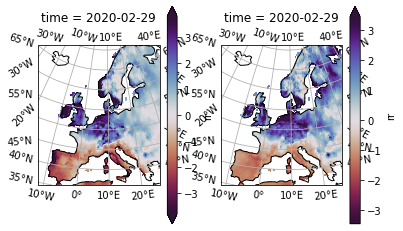

In [13]:
fig, axs = plt.subplots(1, 2,subplot_kw={'projection': ccrs.EuroPP()})

EOBS2020_anomaly.sel(time='2020-02').plot(transform=ccrs.PlateCarree(), robust = True, cmap=plt.cm.twilight_shifted_r, ax=axs[0])
EOBS2020_sd_anomaly.sel(time='2020-02').plot(transform=ccrs.PlateCarree(), robust = True, cmap=plt.cm.twilight_shifted_r, ax=axs[1])
#  .plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[0]))  #,cmap=plt.cm.Blues,
# EOBS['rr'].mean('time').plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[1])

for ax in axs.flat:
    ax.coastlines(resolution='110m')
    ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
#     ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                       linewidth=2, color='gray', alpha=0.5, linestyle='--')
# axs[0].set_title('Feb')
# axs[1].set_title('EOBS')

## Concatenate SEAS5

The SEAS5 data consists of 175 netcdf files that we downloaded from CDS ([1.2](reference). We concatenate those into one netcdf file here. We create a netcdf file containing the dimensions lat, lon, number (25 ensembles), time (35 years) and leadtime (5 initialization months). To generate this, we loop over lead times, and open all 35 years of the lead time and then concatenate those leadtimes. 

In [4]:
init_months = np.append(np.arange(9,13),1) ## Initialization months 9-12,1 (Sep-Jan)


In [8]:
SEAS5_ld1= xr.open_mfdataset('../UK_example/SEAS5/' + '*01.nc', combine='by_coords') # Load the first lead time 
SEAS5= SEAS5_ld1 # Create the xarray dataset to concatenate over
for init_month in init_months[0:-1][::-1]: ## Remove the first that we already have and invert so it is lead time 1-5
    print(init_month)
    SEAS5_ld = xr.open_mfdataset('../UK_example/SEAS5/' + '*' +  "%.2i" % init_month + '.nc', combine='by_coords') # Load the first lead time to concatenate over
    SEAS5=xr.concat([SEAS5,SEAS5_ld],dim='leadtime') 


12
11
10
9


In [1]:
SEAS5 = SEAS5.assign_coords(leadtime = np.arange(5) + 2) # assign leadtime coordinates
SEAS5['tprate'] = SEAS5['tprate'] * 1000 * 3600 * 24 ## From m/s to mm/d
SEAS5['tprate'].attrs = {'long_name': 'rainfall',
 'units': 'mm/day',
 'standard_name': 'thickness_of_rainfall_amount'}
SEAS5.load()
# SEAS5.to_netcdf('../UK_example/SEAS5/SEAS5.nc') # for future import

NameError: name 'SEAS5' is not defined

## Compare SEAS5 to EOBS

In [1]:
fig, axs = plt.subplots(1, 2,subplot_kw={'projection': ccrs.OSGB()})

SEAS5['tprate'].mean(dim = ['time','leadtime','number']).plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[0])  #,cmap=plt.cm.Blues,
EOBS['rr'].mean('time').plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[1])
# EOBS2020['rr'].plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[2])

for ax in axs.flat:
    ax.coastlines(resolution='110m')
    
axs[0].set_title('SEAS5')
axs[1].set_title('EOBS')
# axs[2].set_title('EOBS 2020')

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'SEAS5')

Text(0.5, 1.0, 'EOBS')

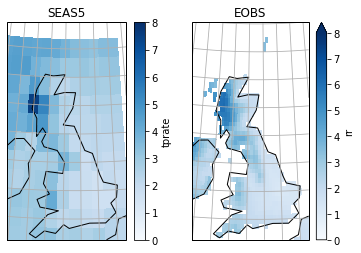

In [23]:
fig, axs = plt.subplots(1, 2,subplot_kw={'projection': ccrs.OSGB()})

(SEAS5['tprate'].mean(dim = ['time','leadtime','number'])
#  .sel(latitude=slice(),longitude=slice())
 .plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[0]))  #,cmap=plt.cm.Blues,
EOBS['rr'].mean('time').plot(transform=ccrs.PlateCarree(), vmin = 0, vmax = 8, cmap=plt.cm.Blues, ax=axs[1])

for ax in axs.flat:
    ax.coastlines(resolution='110m')
    ax.gridlines()
#     ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                       linewidth=2, color='gray', alpha=0.5, linestyle='--')
axs[0].set_title('SEAS5')
axs[1].set_title('EOBS')

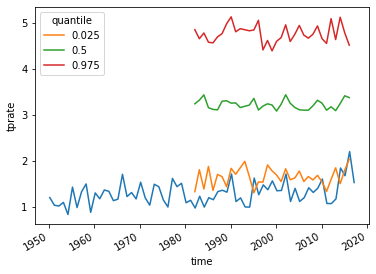

In [152]:
# np.arange('1950', '2017', dtype='datetime64[Y]')
EOBS['rr'].mean(dim = ['latitude','longitude']).plot(x='time')

Quantiles = SEAS5['tprate'].mean(dim = ['latitude','longitude']).quantile([2.5/100, 0.5, 97.5/100], dim=['number','leadtime'])
Quantiles.plot.line(x='time')

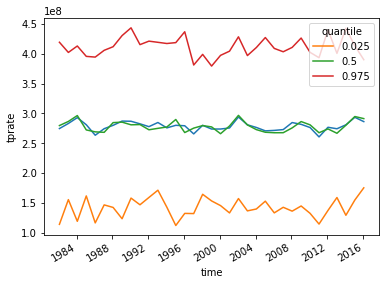

In [111]:
# SEAS5['tprate'].mean(dim = ['latitude','longitude','number','leadtime']).plot.line(x = 'time')
Quantiles = SEAS5['tprate'].mean(dim = ['latitude','longitude']).quantile([2.5/100, 0.5, 97.5/100], dim=['number','leadtime'])
Quantiles.plot.line(x='time')
# plt.plot(Quantiles.sel(quantile=0.5),label = 'SEAS5 Median')
# plt.fill_between(Quantiles.sel(quantile=0.025), Quantiles.sel(quantile=0.975), color='green', alpha=0.2,label = '97.5% percentile')

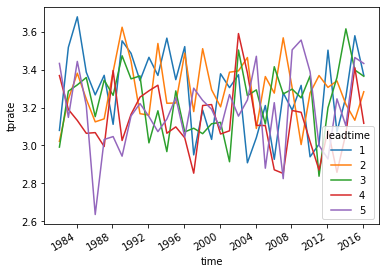

In [95]:
SEAS5['tprate'].mean(dim = ['latitude','longitude','number']).plot.line(x = 'time')


In [ ]:
Quantiles = Tapajos.assign_coords(time=np.tile(time_year,400)).groupby("time.month").quantile([2.5/100, 0.5, 97.5/100, 99/100, 0.999, 0.9999], dim="time")
plt.plot(np.arange(1,13), Quantiles.sel(quantile=0.5),label = 'Median of 2000 years')
plt.fill_between(np.arange(1,13), Quantiles.sel(quantile=0.025), Quantiles.sel(quantile=0.975), color='green', alpha=0.2,label = '97.5% percentile')